## Programming for Data Analyis Project Semester (2) 2020
Brendan Ryan GMIT

I have picked on a real world phenomenon in my own professional life. This is what  is the likelyhood of a member of the financial institution I work in availing of a service (in this case take a loan), based on their age, sex and employment status and then look at the the type of product they normally borrow for. 

I will be using the following variables

- AGE
- Month (month of application)
- Date (date of appliation)
- Employment Status
- Gender
- Loan Type
- Loan Amount Range
- Loan Amount


Import the required libraries
** Give brief descriptoin of what each library does..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import our Data Set based on the output of ones years lending 


In [2]:
import pandas as pd
df = pd.read_csv('analysis.csv')

## Test that our data set has loaded
** note maybe add in here only to load some rows

In [3]:
df

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
0,19,October,43742,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,43705,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,43552,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,43736,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,43699,STUDENT,Male,Student,"5,001 - 10,000",10000.0
...,...,...,...,...,...,...,...,...
3931,85,June,43623,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,43521,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,43801,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,43525,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0


Test that our improted data looks ok by using df.head and df.tail 

In [4]:
df.head()

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
0,19,October,43742,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,43705,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,43552,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,43736,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,43699,STUDENT,Male,Student,"5,001 - 10,000",10000.0


In [5]:
df.tail()

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
3931,85,June,43623,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,43521,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,43801,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,43525,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3935,89,March,43552,RETIRED,FEMALE,Personal,"1,001 - 5,000",3000.0


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of varibales we have to work with using the df.dtypes funtion 

In [6]:
df.dtypes

Age                    int64
Month                 object
Date                   int64
Employment Status     object
Gender                object
Loan Purpose          object
Loan Amount Range     object
Loan Amount          float64
dtype: object

Ok as we can see from above we are dealing with 2 varibales of type object and 1 variable of type int64

In [7]:
df.describe()

,Age,Date,Loan Amount
count,3936.000000,3936.000000,3936.000000
mean,45.241362,43654.225610,4755.631979
std,15.595089,104.040777,8383.672677
min,19.000000,43467.000000,0.000000
25%,32.000000,43563.000000,700.000000
50%,44.000000,43657.000000,2000.000000
75%,57.000000,43746.000000,5000.000000
max,89.000000,43830.000000,102500.000000


ok as Age is our only colum of type integer it is the only one which will be returned for statistical values as shown above 

lets have a look at df.info which is another usefulo tol to give us more info on our dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3936 non-null   int64  
 1   Month              3936 non-null   object 
 2   Date               3936 non-null   int64  
 3   Employment Status  3936 non-null   object 
 4   Gender             3936 non-null   object 
 5   Loan Purpose       3936 non-null   object 
 6   Loan Amount Range  3936 non-null   object 
 7   Loan Amount        3936 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 246.1+ KB


look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html

In [9]:
pd.to_datetime(df["Date"])# - not working lets come back to this and research some more

0      1970-01-01 00:00:00.000043742
1      1970-01-01 00:00:00.000043705
2      1970-01-01 00:00:00.000043552
3      1970-01-01 00:00:00.000043736
4      1970-01-01 00:00:00.000043699
                    ...             
3931   1970-01-01 00:00:00.000043623
3932   1970-01-01 00:00:00.000043521
3933   1970-01-01 00:00:00.000043801
3934   1970-01-01 00:00:00.000043525
3935   1970-01-01 00:00:00.000043552
Name: Date, Length: 3936, dtype: datetime64[ns]

### Best practice convernt some of our data types into categories 

In [10]:
df[["Month","Gender", "Employment Status","Loan Purpose"]] = df[["Month","Gender", "Employment Status","Loan Purpose"]].astype("category")

In [11]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                3936 non-null   int64   
 1   Month              3936 non-null   category
 2   Date               3936 non-null   int64   
 3   Employment Status  3936 non-null   category
 4   Gender             3936 non-null   category
 5   Loan Purpose       3936 non-null   category
 6   Loan Amount Range  3936 non-null   object  
 7   Loan Amount        3936 non-null   float64 
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 139.6+ KB


## Reviewing the data to figure out the types of distributions

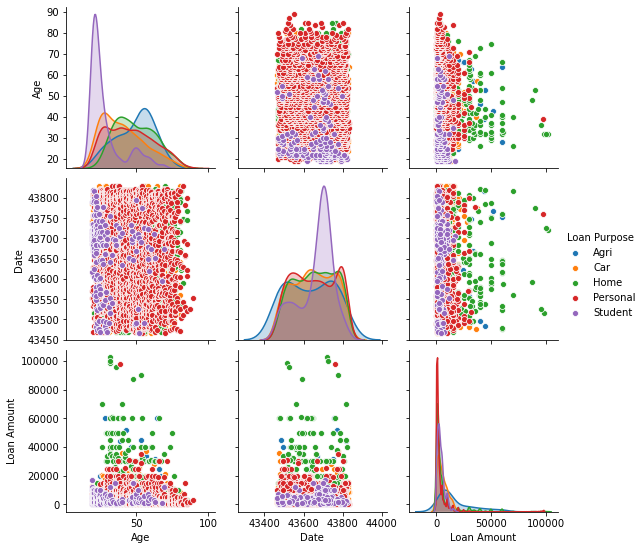

In [12]:
sns.pairplot(df,hue ="Loan Purpose");

Count plot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. Command for creating countplot is:

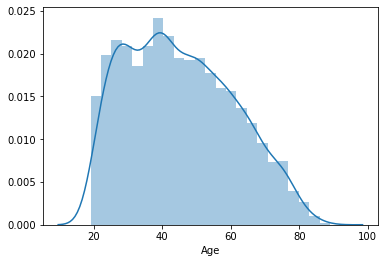

In [13]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
Age = df["Age"]
sns.distplot(Age);

In [14]:
df.Age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: Age, dtype: float64

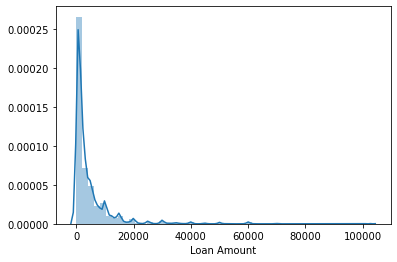

In [15]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
#Loan Amount = df["Loan Amount"]
sns.distplot(df["Loan Amount"]);

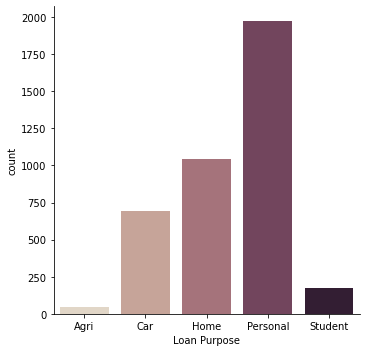

In [16]:
sns.catplot(x="Loan Purpose", kind="count", palette="ch:.25", data=df)
#https://seaborn.pydata.org/tutorial/categorical.html

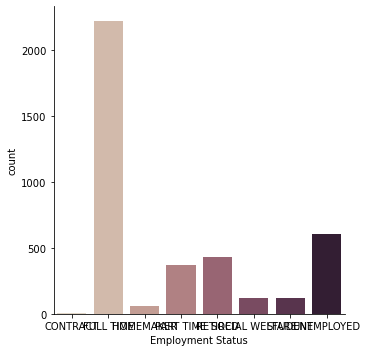

In [17]:
sns.catplot(x="Employment Status", kind="count", palette="ch:.25", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

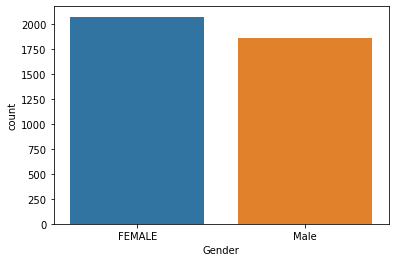

In [18]:
sns.countplot(x='Gender',data=df)
#https://datascienceplus.com/seaborn-categorical-plots-in-python/

In [19]:
df[["Gender","Age"]].groupby("Gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,Age
Gender,
FEMALE,2072
Male,1864


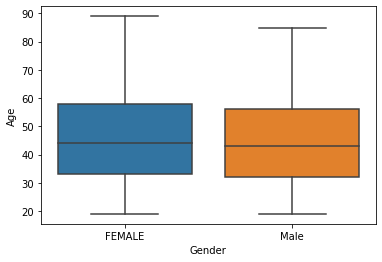

In [20]:
sns.boxplot(x='Gender',y="Age",data=df);

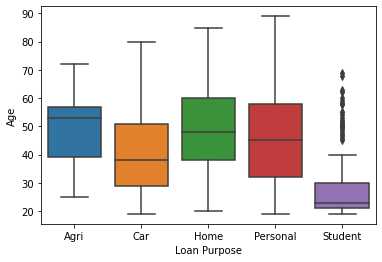

In [21]:
sns.boxplot(x='Loan Purpose',y="Age",data=df);

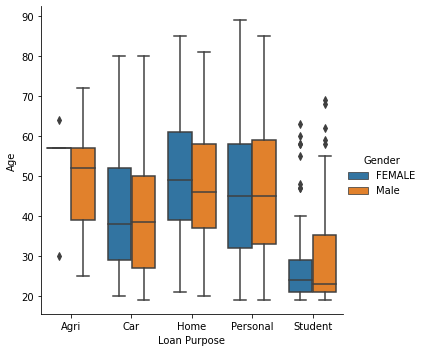

In [22]:
sns.catplot(x="Loan Purpose", y="Age", hue="Gender", kind="box", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

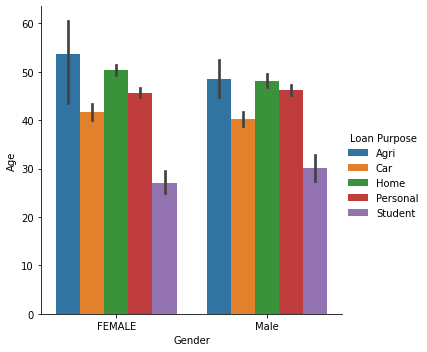

In [23]:
sns.catplot(x="Gender", y="Age", hue="Loan Purpose", kind="bar", data=df);

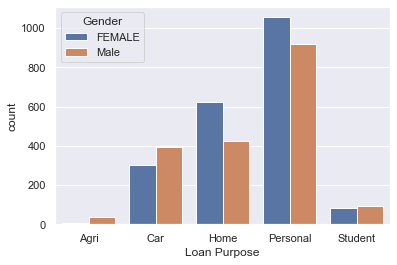

In [24]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Loan Purpose',hue="Gender" , data=df)
plt.show()

In [25]:
#https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012

## Create the sample random data



## AGE SAMPLE DATA

Start with the creation of the sample data as per the AGE - as we say above the distribtion of the Age varibale is closest aligned to that of a Normal Distribution

I am going to use the pands df.describe fuction to get the mean and standard deviation of the data in teh Age column - we will use thes as part
of our Numpy random.normal fucntion to get some random data

In [26]:
df.Age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: Age, dtype: float64

Testing to see can i create some variables - neeed to set proabilty - how will i do this accross the varibales ? Maybe need a loop or functions?

In [27]:
n_samples = 4000
mean_age, deviation_age = 45.241362, 15.595089

In [64]:
Random_Age = np.random.normal(45.241362,15.595089,n_samples).astype(int)

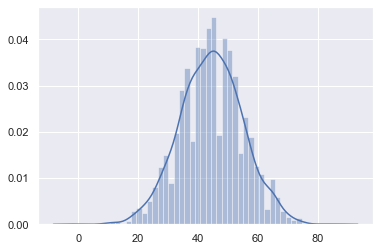

In [63]:
sns.distplot(Random_Age);

In [30]:
#sns.distplot(Age);
#df.groupby("Age").Loan.count()
#df.count(["Loan Purpose"])
#test = df['Loan Purpose'].count
#test

## LOAN TYPES SAMPLE DATA

In [31]:
sample_loan_types = df['Loan Purpose'].unique().tolist()
#https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/
sample_loan_types

['Car', 'Student', 'Personal', 'Home', 'Agri']

In [32]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
#https://stackoverflow.com/questions/29403192/convert-series-returned-by-pandas-series-value-counts-to-a-dictionary
sample_loan_types_prob =dict(df['Loan Purpose'].value_counts(True))
sample_loan_types_prob

{'Personal': 0.501270325203252,
 'Home': 0.2654979674796748,
 'Car': 0.17682926829268292,
 'Student': 0.04496951219512195,
 'Agri': 0.011432926829268292}

In [33]:
Random_Loan = np.random.choice(sample_loan_types, size=n_samples,p=[0.176829,0.044970,0.501270,0.265498,0.011433])
#0.176829,0.044970,0.501270,0.265498,0.011433
dftest = pd.DataFrame({'Random_Loan':Random_Loan})
probabilty_test =dict(dftest['Random_Loan'].value_counts(True))
probabilty_test

{'Personal': 0.48725,
 'Home': 0.2755,
 'Car': 0.1775,
 'Student': 0.04825,
 'Agri': 0.0115}

## GENDER SAMPLE DATA

In [34]:
Gender = ("Male", "Female")
Random_Gender = np.random.choice(Gender,size = n_samples,p = [.45,.55])

#Random_Gender.describe
#Random_Gender

## Sample Loan amounts

In [35]:
df["Loan Amount"].describe()

count      3936.000000
mean       4755.631979
std        8383.672677
min           0.000000
25%         700.000000
50%        2000.000000
75%        5000.000000
max      102500.000000
Name: Loan Amount, dtype: float64

In [36]:
sample_loan_amounts_prob =dict(df['Loan Amount'].value_counts(True))
#sample_loan_amounts_prob

In [37]:
#there must be a random choices in Numpy not just from standard libruary?
#https://stackoverflow.com/questions/4859292/how-to-get-a-random-value-from-dictionary-in-python
#https://stackoverflow.com/questions/40927221/how-to-choose-keys-from-a-python-dictionary-based-on-weighted-probability
import random
Random_Loan_Amount = random.choices(list(sample_loan_amounts_prob.keys()), weights=sample_loan_amounts_prob.values(), k=n_samples)
#random_loan_amounts

In [57]:
#create some random varibales just for testing at the minute
#researched https://www.delftstack.com/howto/python-pandas/how-to-randomly-shuffle-dataframe-rows-in-pandas/
#Loan_Types = ("Personal", "Car", "Agri", "Student","Home" )


#Create a test data frame based on above to see does it work
sample_df = pd.DataFrame({'Sample_Age':Random_Age ,
                   'Sample_Loan_Type':Random_Loan ,
                   'Sample_Gender': Random_Gender ,
                          'Sample_Loan_Amount':Random_Loan_Amount
                  })

In [58]:
sample_df
#np.random.permutation(sample_df)

,Sample_Age,Sample_Loan_Type,Sample_Gender,Sample_Loan_Amount
0,68,Personal,Male,500.0
1,50,Home,Female,7000.0
2,50,Personal,Male,3000.0
3,32,Home,Female,500.0
4,45,Home,Female,10000.0
...,...,...,...,...
3995,60,Home,Male,1000.0
3996,45,Car,Female,500.0
3997,31,Car,Male,500.0
3998,25,Personal,Female,440.0


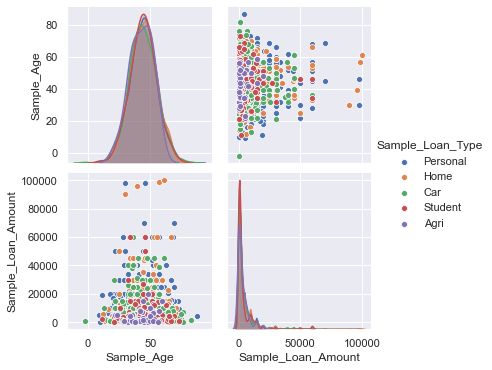

In [59]:
sns.pairplot(sample_df,hue ="Sample_Loan_Type");
#Sample_Loan_Type

In [65]:
sample_df.describe()

,Sample_Age,Sample_Loan_Amount
count,4000.000000,4000.000000
mean,44.457500,4683.932288
std,10.491959,8100.474480
min,-2.000000,0.000000
25%,37.000000,650.000000
50%,45.000000,2000.000000
75%,51.000000,5000.000000
max,87.000000,100000.000000


In [66]:
df.describe()

,Age,Date,Loan Amount
count,3936.000000,3936.000000,3936.000000
mean,45.241362,43654.225610,4755.631979
std,15.595089,104.040777,8383.672677
min,19.000000,43467.000000,0.000000
25%,32.000000,43563.000000,700.000000
50%,44.000000,43657.000000,2000.000000
75%,57.000000,43746.000000,5000.000000
max,89.000000,43830.000000,102500.000000
